# KMeans Clustering Notebook
--------
We will use Mall Customers dataset called Mall_Customers.csv

We will only columns Annual Income & Spending Score to make things clearer in KMeans.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Read Data

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df = df.replace('NaN', None)
df = df.dropna()
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df = df.drop(['CustomerID', 'Gender', 'Age'], axis='columns', errors='ignore')
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


## Divide Data

## Huh?!
---
Got you! We don't split data to X and Y here. We don't have a Y! This is an unsupervised learning method, which means we don't know what is the Y. We only have few features.

In [4]:
X1, X2 = df.iloc[:,0], df.iloc[:,1]
print(X1.shape, X2.shape)

(200,) (200,)


## Visualizing the Dataset

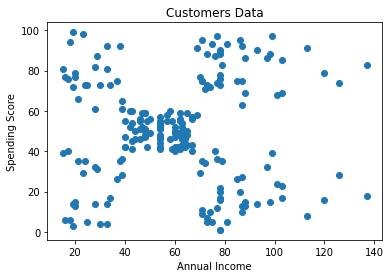

In [5]:
plt.scatter(X1, X2)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customers Data')
plt.show()

## From Scratch:

### Define function for calculating inertia

In [6]:
# set value for K
K = 5
data_points = df.to_numpy()
# get random indices of len K, ranging from 0 to len(df) - 1
indices = np.random.randint(0, len(X1), K)

# take centers at corresponding indices
centers = []
for indx in indices:
    centers.append(data_points[indx])
centers = np.array(centers)

# I will iterate till either of these two conditions happen:
# I iterate 100 times, or Centers don't change from last time
for i in range(100):
    prev_centers = centers.copy()
    labels = []
    # iterate over all points, and assign a label for them
    for point in data_points:
        distances = []
        # iterate over all centers for the clusters you previously defined
        # calculate the euclidean distance and store it in distances
        for j in range(K):
            dist = np.sqrt(np.sum((point - centers[j]) ** 2))
            distances.append(dist)
        # get the the index of the minimum distance
        min_val_indx = np.argpartition(distances, 1)[0]
        # add this index as the label for this data point
        labels.append(min_val_indx)
    # now we need to recalculate the center of the points
    labels = np.array(labels)
    for j in np.unique(labels):
        points_within_cluster = data_points[labels == j]
        centers[j] = np.mean(points_within_cluster)
    
    if prev_centers is centers:
        print('Break at', i)
        break


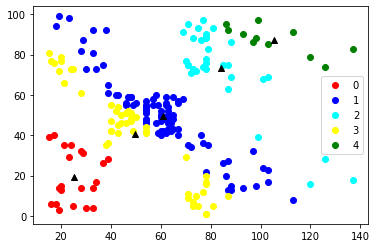

In [7]:
colors_list = ['red', 'blue', 'cyan', 'yellow', 'green', 'pink', 'orange', 'black']
for k_val in range(K):
    plt.scatter(X1[labels == k_val], X2[labels == k_val], color=colors_list[k_val], label=k_val)
    plt.scatter(np.mean(X1[labels == k_val]), np.mean(X2[labels == k_val]), color='black', marker='^')

plt.legend()
plt.show()

## Using SKlearn

In [8]:
model = KMeans(n_clusters=5, init='random')
model = model.fit(df)

In [9]:
labels = model.predict(df)
print(len(labels))
np.unique(labels)

200


array([0, 1, 2, 3, 4])

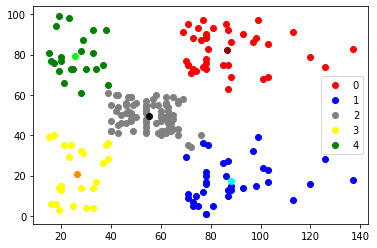

In [10]:
plt.scatter(X1[labels == 0], X2[labels == 0], color='red', label='0')
mean1 = np.mean(X1[labels == 0])
mean2 = np.mean(X2[labels == 0])
plt.scatter(mean1, mean2, color='darkred')

plt.scatter(X1[labels == 1], X2[labels == 1], color='blue', label='1')
mean1 = np.mean(X1[labels == 1])
mean2 = np.mean(X2[labels == 1])
plt.scatter(mean1, mean2, color='cyan')

plt.scatter(X1[labels == 2], X2[labels == 2], color='grey', label='2')
mean1 = np.mean(X1[labels == 2])
mean2 = np.mean(X2[labels == 2])
plt.scatter(mean1, mean2, color='black')

plt.scatter(X1[labels == 3], X2[labels == 3], color='yellow', label='3')
mean1 = np.mean(X1[labels == 3])
mean2 = np.mean(X2[labels == 3])
plt.scatter(mean1, mean2, color='darkorange')

plt.scatter(X1[labels == 4], X2[labels == 4], color='green', label='4')
mean1 = np.mean(X1[labels == 4])
mean2 = np.mean(X2[labels == 4])
plt.scatter(mean1, mean2, color='lime')

plt.legend()
plt.show()

In [11]:
sil_score = silhouette_score(df, labels)
print("Silhouette Score is: %.2f" % sil_score)

Silhouette Score is: 0.55


### Using KMeans++ to initialize K

In [12]:
model = KMeans(init='k-means++')
model = model.fit(df)
labels = model.predict(df)
print(np.unique(labels))
K = len(np.unique(labels))
K

[0 1 2 3 4 5 6 7]


8

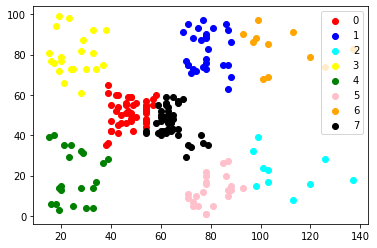

In [13]:
colors_list = ['red', 'blue', 'cyan', 'yellow', 'green', 'pink', 'orange', 'black']
for k_val in range(K):
    plt.scatter(X1[labels == k_val], X2[labels == k_val], color=colors_list[k_val], label=k_val)

plt.legend()
plt.show()

In [14]:
sil_score = silhouette_score(df, labels)
print("Silhouette Score is: %.2f" % sil_score)

Silhouette Score is: 0.46
